In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Konstanta universal
R = 8.314  # J/(mol K), gas constant
T = 298.15  # Temperature in Kelvin (example: 25°C)

# Konstanta untuk Variant A
k1_A = 0.409 * 1.08e8 * np.exp(-83.2e3 / (R * T))
k2_A = 0.591 * 1.68e31 * np.exp(-119.3e3 / (R * T))

# Konstanta untuk Variant B
k1_B = 0.115 * 8.89e6 * np.exp(-72.0e3 / (R * T))
k2_B = 0.885 * 5.13e25 * np.exp(-197.0e3 / (R * T))

# Konstanta untuk Variant C
k1_C = 0.327 * 4.79e13 * np.exp(-111.3e3 / (R * T))
k2_C = 0.673 * 3.48e20 * np.exp(-164.1e3 / (R * T))

In [3]:
# Definisi sistem ODE untuk Variant A
def ode_variant_A(t, y):
    A1, B1, C1 = y
    dA1_dt = -k1_A * A1
    dB1_dt = k1_A * A1 - k2_A * B1
    dC1_dt = k2_A * B1
    return [dA1_dt, dB1_dt, dC1_dt]

# Definisi sistem ODE untuk Variant B
def ode_variant_B(t, y):
    A2, B2, C2 = y
    dA2_dt = -k1_B * A2
    dB2_dt = k1_B * A2 - k2_B * B2
    dC2_dt = k2_B * B2
    return [dA2_dt, dB2_dt, dC2_dt]

# Definisi sistem ODE untuk Variant C
def ode_variant_C(t, y):
    A3, B3, C3 = y
    dA3_dt = -k1_C * A3
    dB3_dt = k1_C * A3 - k2_C * B3
    dC3_dt = k2_C * B3
    return [dA3_dt, dB3_dt, dC3_dt]

# Kondisi awal untuk ketiga varian: semua reaktan ada (1 mol), produk 0
initial_conditions = [1.0, 0.0, 0.0]  # [A, B, C]

t_span = (0, 100)  # Kurangi rentang waktu jika terlalu besar
t_eval = np.linspace(0, 100, 1000)  # Sesuaikan jumlah evaluasi waktu


In [4]:
# Memecahkan ODE untuk Variant A dengan LSODA
solution_A = solve_ivp(ode_variant_A, t_span, initial_conditions, t_eval=t_eval, method='LSODA')
# Memecahkan ODE untuk Variant A dengan LSODA
solution_B = solve_ivp(ode_variant_B, t_span, initial_conditions, t_eval=t_eval, method='LSODA')
# Memecahkan ODE untuk Variant A dengan LSODA
solution_C = solve_ivp(ode_variant_C, t_span, initial_conditions, t_eval=t_eval, method='LSODA')


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.0000000000000D+00   r2 =  0.1206230583176D-04


/Users/user/Downloads/Anthrax Project/myenv/lib/python3.11/site-packages/scipy/integrate/_ivp/lsoda.py:161: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  solver._y, solver.t = integrator.run(


IndexError: list index out of range

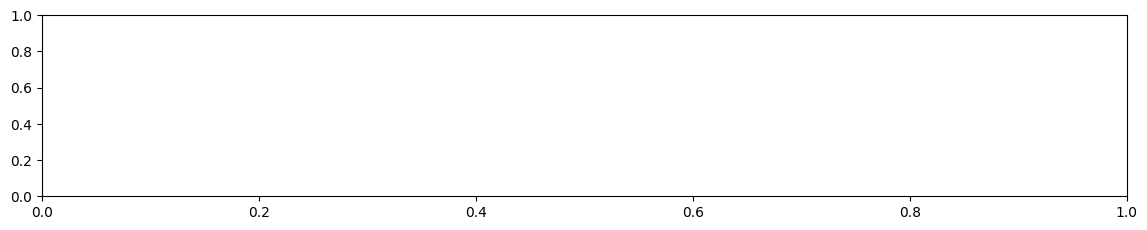

In [6]:
# Plot hasil Variant A
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(solution_A.t, solution_A.y[0], label='[A1] (Reaktan)')
plt.plot(solution_A.t, solution_A.y[1], label='[B1] (Produk Antara)')
plt.plot(solution_A.t, solution_A.y[2], label='[C1] (Produk Akhir)')
plt.title('Simulasi Kinetik Reaksi Variant A')
plt.xlabel('Waktu (s)')
plt.ylabel('Konsentrasi')
plt.legend()
plt.grid(True)

# Plot hasil Variant B
plt.subplot(3, 1, 2)
plt.plot(solution_B.t, solution_B.y[0], label='[A2] (Reaktan)')
plt.plot(solution_B.t, solution_B.y[1], label='[B2] (Produk Antara)')
plt.plot(solution_B.t, solution_B.y[2], label='[C2] (Produk Akhir)')
plt.title('Simulasi Kinetik Reaksi Variant B')
plt.xlabel('Waktu (s)')
plt.ylabel('Konsentrasi')
plt.legend()
plt.grid(True)

# Plot hasil Variant C
plt.subplot(3, 1, 3)
plt.plot(solution_C.t, solution_C.y[0], label='[A3] (Reaktan)')
plt.plot(solution_C.t, solution_C.y[1], label='[B3] (Produk Antara)')
plt.plot(solution_C.t, solution_C.y[2], label='[C3] (Produk Akhir)')
plt.title('Simulasi Kinetik Reaksi Variant C')
plt.xlabel('Waktu (s)')
plt.ylabel('Konsentrasi')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
